In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scripts import *
pd.set_option('display.max_columns', None)

In [154]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [155]:
data = pd.read_csv('data/ufc-master.csv')

data.head(5)

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,TitleBout,WeightClass,Gender,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgSubAtt,BlueAvgTDLanded,BlueAvgTDPct,BlueLongestWinStreak,BlueLosses,BlueTotalRoundsFought,BlueTotalTitleBouts,BlueWinsByDecisionMajority,BlueWinsByDecisionSplit,BlueWinsByDecisionUnanimous,BlueWinsByKO,BlueWinsBySubmission,BlueWinsByTKODoctorStoppage,BlueWins,BlueStance,BlueHeightCms,BlueReachCms,BlueWeightLbs,RedCurrentLoseStreak,RedCurrentWinStreak,RedDraws,RedAvgSigStrLanded,RedAvgSigStrPct,RedAvgSubAtt,RedAvgTDLanded,RedAvgTDPct,RedLongestWinStreak,RedLosses,RedTotalRoundsFought,RedTotalTitleBouts,RedWinsByDecisionMajority,RedWinsByDecisionSplit,RedWinsByDecisionUnanimous,RedWinsByKO,RedWinsBySubmission,RedWinsByTKODoctorStoppage,RedWins,RedStance,RedHeightCms,RedReachCms,RedWeightLbs,RedAge,BlueAge,LoseStreakDif,WinStreakDif,LongestWinStreakDif,WinDif,LossDif,TotalRoundDif,TotalTitleBoutDif,KODif,SubDif,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,EmptyArena,BMatchWCRank,RMatchWCRank,RWFlyweightRank,RWFeatherweightRank,RWStrawweightRank,RWBantamweightRank,RHeavyweightRank,RLightHeavyweightRank,RMiddleweightRank,RWelterweightRank,RLightweightRank,RFeatherweightRank,RBantamweightRank,RFlyweightRank,RPFPRank,BWFlyweightRank,BWFeatherweightRank,BWStrawweightRank,BWBantamweightRank,BHeavyweightRank,BLightHeavyweightRank,BMiddleweightRank,BWelterweightRank,BLightweightRank,BFeatherweightRank,BBantamweightRank,BFlyweightRank,BPFPRank,BetterRank,Finish,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,Alexandre Pantoja,Kai Asakura,-250.0,215.0,40.0000,215.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,True,Flyweight,MALE,5,0,0,0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,Orthodox,172.72,175.26,125,0,6,0,4.41,0.49,0.8,2.61,0.47,6,3,42,3,0,2,4,2,4,0,12,Orthodox,165.10,170.18,125,34,31,0,-6,-6,-12,-3,-42,-3,-2,-4,7.62,5.08,-3,-4.41,-0.8,-2.61,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,SUB,Rear Naked Choke,2.0,2:05,425.0,300.0,800.0,150.0,2500.0,400.0,350.0
1,Shavkat Rakhmonov,Ian Machado Garry,-210.0,295.0,47.6190,295.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,False,Welterweight,MALE,3,0,8,0,5.50,0.55,0.3,0.77,0.55,8,0,20,0,0,1,4,3,0,0,8,Orthodox,190.50,187.96,170,0,6,0,4.12,0.61,1.8,1.49,0.29,6,0,11,0,0,0,0,1,5,0,6,Orthodox,185.42,195.58,170,30,27,0,2,2,2,0,9,0,2,-5,5.08,-7.62,-3,1.38,-1.5,-0.72,NaN,7.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,Red,U-DEC,NaN,5.0,5:00,1500.0,250.0,650.0,180.0,3000.0,240.0,700.0
2,Ciryl Gane,Alexander Volkov,-380.0,300.0,26.3158,300.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,False,Heavyweight,MALE,3,0,4,0,5.13,0.57,0.2,0.45,0.63,4,4,44,0,0,1,4,6,1,0,12,Orthodox,200.66,203.20,250,0,1,0,5.49,0.60,0.5,0.58,0.21,7,2,33,3,0,0,3,4,2,0,9,Orthodox,193.04,205.74,245,34,36,0,3,-3,3,2,11,-3,2,-1,7.62,-2.54,2,-0.36,-0.3,-0.13,NaN,3.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,S-DEC,NaN,3.0,5:00,900.0,-160.0,450.0,1100.0,3000.0,350.0,1100.0
3,Bryce Mitchell,Kron Gracie,-950.0,625.0,10.5263,625.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Red,False,Featherweight,MALE,3,2,0,0,3.74,0.44,0.5,0.47,0.25,1,2,7,0,0,0,0,0,1,0,1,Southpaw,175.26,177.80,145,1,0,0,2.30,0.58,1.6,3.45,0.41,6,2,22,0,1,0,5,0,1,0,7,Southpaw,177.80,177.80,145,30,36,1,0,-5,-6,0,-15,0,0,0,-2.54,0.00,6,1.44,-1.1,-2.98,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Red,KO/TKO,Elbows,3.0,0:39,639.0,-200.0,1100.0,380.0,1400.0,500.0,4000.0
4,Nate Landwehr,Dooho Choi,-130.0,110.0,76.9231,110.0,2024-12-07,"Las Vegas, Nevada, USA",USA,Blue,False,Feathe

In [156]:
len(data)

6528

In [157]:
for col in data.columns:
    print(f'{col} - {data[col].dtype}')

RedFighter - object
BlueFighter - object
RedOdds - float64
BlueOdds - float64
RedExpectedValue - float64
BlueExpectedValue - float64
Date - object
Location - object
Country - object
Winner - object
TitleBout - bool
WeightClass - object
Gender - object
NumberOfRounds - int64
BlueCurrentLoseStreak - int64
BlueCurrentWinStreak - int64
BlueDraws - int64
BlueAvgSigStrLanded - float64
BlueAvgSigStrPct - float64
BlueAvgSubAtt - float64
BlueAvgTDLanded - float64
BlueAvgTDPct - float64
BlueLongestWinStreak - int64
BlueLosses - int64
BlueTotalRoundsFought - int64
BlueTotalTitleBouts - int64
BlueWinsByDecisionMajority - int64
BlueWinsByDecisionSplit - int64
BlueWinsByDecisionUnanimous - int64
BlueWinsByKO - int64
BlueWinsBySubmission - int64
BlueWinsByTKODoctorStoppage - int64
BlueWins - int64
BlueStance - object
BlueHeightCms - float64
BlueReachCms - float64
BlueWeightLbs - int64
RedCurrentLoseStreak - int64
RedCurrentWinStreak - int64
RedDraws - int64
RedAvgSigStrLanded - float64
RedAvgSigStrPc

# Informações Básicas da Luta

- **Date:**  
  Data em que a luta ocorreu.
- **Location:**  
  Local (cidade, arena) onde a luta foi realizada.
- **Country:**  
  País onde a luta aconteceu.
- **TitleBout:**  
  Indica se a luta é disputada por um título (por exemplo, verdadeiro ou falso).
- **WeightClass:**  
  Categoria de peso dos lutadores (ex.: Peso Leve, Peso Médio, etc).
- **Gender:**  
  Gênero dos lutadores (masculino ou feminino).
- **NumberOfRounds:**  
  Número de rounds programados ou efetivamente disputados na luta.

# Lutadores e Odds

- **RedFighter:**  
  Nome do lutador do canto vermelho.
- **BlueFighter:**  
  Nome do lutador do canto azul.
- **RedOdds:**  
  Odds (probabilidades e retorno potencial) para o lutador do canto vermelho.
- **BlueOdds:**  
  Odds para o lutador do canto azul.
- **RedExpectedValue:**  
  Valor esperado (expected value) associado às apostas no lutador vermelho.
- **BlueExpectedValue:**  
  Valor esperado associado às apostas no lutador azul.
- **Winner:**  
  Indicação de qual lutador venceu a luta (pode ser “Red”, “Blue” ou o nome do vencedor).

# Estatísticas do Lutador Azul

- **BlueCurrentLoseStreak:**  
  Número atual de derrotas consecutivas do lutador azul.
- **BlueCurrentWinStreak:**  
  Número atual de vitórias consecutivas do lutador azul.
- **BlueDraws:**  
  Quantidade de empates registrados pelo lutador azul.
- **BlueAvgSigStrLanded:**  
  Média de golpes significativos conectados pelo lutador azul por luta.
- **BlueAvgSigStrPct:**  
  Percentual médio de golpes significativos conectados.
- **BlueAvgSubAtt:**  
  Média de tentativas de submissão realizadas.
- **BlueAvgTDLanded:**  
  Média de quedas (takedowns) bem-sucedidas.
- **BlueAvgTDPct:**  
  Percentual médio de quedas conectadas.
- **BlueLongestWinStreak:**  
  Maior sequência de vitórias já alcançada pelo lutador azul.
- **BlueLosses:**  
  Total de derrotas acumuladas.
- **BlueTotalRoundsFought:**  
  Número total de rounds disputados ao longo da carreira.
- **BlueTotalTitleBouts:**  
  Número de lutas por título em que o lutador azul participou.
- **BlueWinsByDecisionMajority:**  
  Vitórias obtidas por decisão majoritária.
- **BlueWinsByDecisionSplit:**  
  Vitórias por decisão dividida.
- **BlueWinsByDecisionUnanimous:**  
  Vitórias por decisão unânime.
- **BlueWinsByKO:**  
  Número de vitórias por nocaute.
- **BlueWinsBySubmission:**  
  Número de vitórias por submissão.
- **BlueWinsByTKODoctorStoppage:**  
  Vitórias por TKO devido à parada médica.
- **BlueWins:**  
  Total de vitórias registradas.
- **BlueStance:**  
  Postura ou estilo de luta (ex.: orthodox, southpaw).
- **BlueHeightCms:**  
  Altura do lutador azul em centímetros.
- **BlueReachCms:**  
  Envergadura (alcance) do lutador azul em centímetros.
- **BlueWeightLbs:**  
  Peso do lutador azul em libras.
- **BlueAge:**  
  Idade do lutador azul.

# Estatísticas do Lutador Vermelho

- **RedCurrentLoseStreak:**  
  Número atual de derrotas consecutivas do lutador vermelho.
- **RedCurrentWinStreak:**  
  Número atual de vitórias consecutivas do lutador vermelho.
- **RedDraws:**  
  Quantidade de empates registrados pelo lutador vermelho.
- **RedAvgSigStrLanded:**  
  Média de golpes significativos conectados pelo lutador vermelho por luta.
- **RedAvgSigStrPct:**  
  Percentual médio de golpes significativos conectados.
- **RedAvgSubAtt:**  
  Média de tentativas de submissão realizadas.
- **RedAvgTDLanded:**  
  Média de quedas (takedowns) bem-sucedidas.
- **RedAvgTDPct:**  
  Percentual médio de quedas conectadas.
- **RedLongestWinStreak:**  
  Maior sequência de vitórias já alcançada pelo lutador vermelho.
- **RedLosses:**  
  Total de derrotas acumuladas.
- **RedTotalRoundsFought:**  
  Número total de rounds disputados ao longo da carreira.
- **RedTotalTitleBouts:**  
  Número de lutas por título em que o lutador vermelho participou.
- **RedWinsByDecisionMajority:**  
  Vitórias obtidas por decisão majoritária.
- **RedWinsByDecisionSplit:**  
  Vitórias por decisão dividida.
- **RedWinsByDecisionUnanimous:**  
  Vitórias por decisão unânime.
- **RedWinsByKO:**  
  Número de vitórias por nocaute.
- **RedWinsBySubmission:**  
  Número de vitórias por submissão.
- **RedWinsByTKODoctorStoppage:**  
  Vitórias por TKO (parada médica).
- **RedWins:**  
  Total de vitórias registradas.
- **RedStance:**  
  Postura ou estilo de luta (ex.: orthodox, southpaw).
- **RedHeightCms:**  
  Altura do lutador vermelho em centímetros.
- **RedReachCms:**  
  Envergadura (alcance) do lutador vermelho em centímetros.
- **RedWeightLbs:**  
  Peso do lutador vermelho em libras.
- **RedAge:**  
  Idade do lutador vermelho.

# Diferenças Estatísticas Entre os Lutadores

- **LoseStreakDif:**  
  Diferença entre as sequências atuais de derrotas dos lutadores.
- **WinStreakDif:**  
  Diferença entre as sequências atuais de vitórias.
- **LongestWinStreakDif:**  
  Diferença entre as maiores sequências de vitórias já alcançadas.
- **WinDif:**  
  Diferença no número total de vitórias entre os lutadores.
- **LossDif:**  
  Diferença no número total de derrotas.
- **TotalRoundDif:**  
  Diferença no total de rounds disputados.
- **TotalTitleBoutDif:**  
  Diferença no número de lutas por título disputadas.
- **KODif:**  
  Diferença no número de vitórias por nocaute.
- **SubDif:**  
  Diferença no número de vitórias por submissão.
- **HeightDif:**  
  Diferença de altura entre os lutadores.
- **ReachDif:**  
  Diferença na envergadura (alcance).
- **AgeDif:**  
  Diferença de idade entre os lutadores.
- **SigStrDif:**  
  Diferença na média de golpes significativos conectados.
- **AvgSubAttDif:**  
  Diferença na média de tentativas de submissão.
- **AvgTDDif:**  
  Diferença na média de quedas conectadas.

# Informações Adicionais e Rankings

- **EmptyArena:**  
  Indica se a luta ocorreu em arena vazia (por exemplo, sem público).
- **BMatchWCRank:**  
  Ranking do lutador azul baseado na taxa de vitórias (match win rate).
- **RMatchWCRank:**  
  Ranking do lutador vermelho baseado na taxa de vitórias.

## Rankings do Lutador Vermelho por Categoria

- **RWFlyweightRank:** Ranking na categoria Flyweight.
- **RWFeatherweightRank:** Ranking na categoria Featherweight.
- **RWStrawweightRank:** Ranking na categoria Strawweight.
- **RWBantamweightRank:** Ranking na categoria Bantamweight.
- **RHeavyweightRank:** Ranking na categoria Heavyweight.
- **RLightHeavyweightRank:** Ranking na categoria Light Heavyweight.
- **RMiddleweightRank:** Ranking na categoria Middleweight.
- **RWelterweightRank:** Ranking na categoria Welterweight.
- **RLightweightRank:** Ranking na categoria Lightweight.
- **RFeatherweightRank:** Ranking alternativo na categoria Featherweight.
- **RBantamweightRank:** Ranking alternativo na categoria Bantamweight.
- **RFlyweightRank:** Ranking alternativo na categoria Flyweight.
- **RPFPRank:** Ranking baseado em performance ou outro critério (PFP).

## Rankings do Lutador Azul por Categoria

- **BWFlyweightRank:** Ranking na categoria Flyweight.
- **BWFeatherweightRank:** Ranking na categoria Featherweight.
- **BWStrawweightRank:** Ranking na categoria Strawweight.
- **BWBantamweightRank:** Ranking na categoria Bantamweight.
- **BHeavyweightRank:** Ranking na categoria Heavyweight.
- **BLightHeavyweightRank:** Ranking na categoria Light Heavyweight.
- **BMiddleweightRank:** Ranking na categoria Middleweight.
- **BWelterweightRank:** Ranking na categoria Welterweight.
- **BLightweightRank:** Ranking na categoria Lightweight.
- **BFeatherweightRank:** Ranking na categoria Featherweight.
- **BBantamweightRank:** Ranking na categoria Bantamweight.
- **BFlyweightRank:** Ranking na categoria Flyweight.
- **BPFPRank:** Ranking baseado em performance (PFP).
- **BetterRank:**  
  Indica qual dos dois lutadores possui um ranking melhor com base nos critérios avaliados.

# Detalhes do Resultado da Luta

- **Finish:**  
  Tipo de finalização da luta (ex.: KO, submissão, decisão, etc).
- **FinishDetails:**  
  Detalhes adicionais sobre o método de finalização (por exemplo, o tipo de golpe ou técnica utilizada).
- **FinishRound:**  
  Round em que a luta foi finalizada.
- **FinishRoundTime:**  
  Momento exato dentro do round em que ocorreu a finalização.
- **TotalFightTimeSecs:**  
  Duração total da luta expressa em segundos.

# Odds para Situações Específicas

- **RedDecOdds:**  
  Odds para que o lutador vermelho vença por decisão.
- **BlueDecOdds:**  
  Odds para que o lutador azul vença por decisão.
- **RSubOdds:**  
  Odds para vitória do lutador vermelho por submissão.
- **BSubOdds:**  
  Odds para vitória do lutador azul por submissão.
- **RKOOdds:**  
  Odds para vitória do lutador vermelho por nocaute.
- **BKOOdds:**  
  Odds para vitória do lutador azul por nocaute.


In [158]:
for col in data.columns:
    print(f'Numero de NaN na coluna {col} = {data[col].isna().sum()}')

Numero de NaN na coluna RedFighter = 0
Numero de NaN na coluna BlueFighter = 0
Numero de NaN na coluna RedOdds = 227
Numero de NaN na coluna BlueOdds = 226
Numero de NaN na coluna RedExpectedValue = 227
Numero de NaN na coluna BlueExpectedValue = 226
Numero de NaN na coluna Date = 0
Numero de NaN na coluna Location = 0
Numero de NaN na coluna Country = 0
Numero de NaN na coluna Winner = 0
Numero de NaN na coluna TitleBout = 0
Numero de NaN na coluna WeightClass = 0
Numero de NaN na coluna Gender = 0
Numero de NaN na coluna NumberOfRounds = 0
Numero de NaN na coluna BlueCurrentLoseStreak = 0
Numero de NaN na coluna BlueCurrentWinStreak = 0
Numero de NaN na coluna BlueDraws = 0
Numero de NaN na coluna BlueAvgSigStrLanded = 930
Numero de NaN na coluna BlueAvgSigStrPct = 765
Numero de NaN na coluna BlueAvgSubAtt = 832
Numero de NaN na coluna BlueAvgTDLanded = 833
Numero de NaN na coluna BlueAvgTDPct = 842
Numero de NaN na coluna BlueLongestWinStreak = 0
Numero de NaN na coluna BlueLosses =

iremos dropar colunas nao interessantes ou com muitos faltantes

In [159]:
data = data.drop(columns=[
    'RedExpectedValue', 
    'BlueExpectedValue', 
    'EmptyArena', 
    'BMatchWCRank', 
    'RMatchWCRank',
    'RWFlyweightRank',
    'RWFeatherweightRank',
    'RWStrawweightRank',
    'RWBantamweightRank',
    'RHeavyweightRank',
    'RLightHeavyweightRank',
    'RMiddleweightRank',
    'RWelterweightRank',
    'RLightweightRank',
    'RFeatherweightRank',
    'RBantamweightRank',
    'RFlyweightRank',
    'RPFPRank',
    'BWFlyweightRank',
    'BWFeatherweightRank',
    'BWStrawweightRank',
    'BWBantamweightRank',
    'BHeavyweightRank',
    'BLightHeavyweightRank',
    'BMiddleweightRank',
    'BWelterweightRank',
    'BLightweightRank',
    'BFeatherweightRank',
    'BBantamweightRank',
    'BFlyweightRank',
    'BPFPRank',
    'FinishDetails',
    'FinishRoundTime',
    'RedDecOdds',
    'BlueDecOdds',
    'RSubOdds',
    'BSubOdds',
    'RKOOdds',
    'BKOOdds',
    'TotalFightTimeSecs',
    'Location',
    'Country'
])




In [160]:
for col in data.columns:
    print(col)

RedFighter
BlueFighter
RedOdds
BlueOdds
Date
Winner
TitleBout
WeightClass
Gender
NumberOfRounds
BlueCurrentLoseStreak
BlueCurrentWinStreak
BlueDraws
BlueAvgSigStrLanded
BlueAvgSigStrPct
BlueAvgSubAtt
BlueAvgTDLanded
BlueAvgTDPct
BlueLongestWinStreak
BlueLosses
BlueTotalRoundsFought
BlueTotalTitleBouts
BlueWinsByDecisionMajority
BlueWinsByDecisionSplit
BlueWinsByDecisionUnanimous
BlueWinsByKO
BlueWinsBySubmission
BlueWinsByTKODoctorStoppage
BlueWins
BlueStance
BlueHeightCms
BlueReachCms
BlueWeightLbs
RedCurrentLoseStreak
RedCurrentWinStreak
RedDraws
RedAvgSigStrLanded
RedAvgSigStrPct
RedAvgSubAtt
RedAvgTDLanded
RedAvgTDPct
RedLongestWinStreak
RedLosses
RedTotalRoundsFought
RedTotalTitleBouts
RedWinsByDecisionMajority
RedWinsByDecisionSplit
RedWinsByDecisionUnanimous
RedWinsByKO
RedWinsBySubmission
RedWinsByTKODoctorStoppage
RedWins
RedStance
RedHeightCms
RedReachCms
RedWeightLbs
RedAge
BlueAge
LoseStreakDif
WinStreakDif
LongestWinStreakDif
WinDif
LossDif
TotalRoundDif
TotalTitleBoutDif


In [161]:
for col in data.columns:
    if(data[col].isna().sum() > 0):
        print(f'Colunas a tratar: {col} = {data[col].isna().sum()} NaN')

Colunas a tratar: RedOdds = 227 NaN
Colunas a tratar: BlueOdds = 226 NaN
Colunas a tratar: BlueAvgSigStrLanded = 930 NaN
Colunas a tratar: BlueAvgSigStrPct = 765 NaN
Colunas a tratar: BlueAvgSubAtt = 832 NaN
Colunas a tratar: BlueAvgTDLanded = 833 NaN
Colunas a tratar: BlueAvgTDPct = 842 NaN


Colunas a tratar: BlueStance = 3 NaN
Colunas a tratar: RedAvgSigStrLanded = 455 NaN
Colunas a tratar: RedAvgSigStrPct = 357 NaN
Colunas a tratar: RedAvgSubAtt = 357 NaN
Colunas a tratar: RedAvgTDLanded = 357 NaN
Colunas a tratar: RedAvgTDPct = 367 NaN
Colunas a tratar: Finish = 238 NaN
Colunas a tratar: FinishRound = 622 NaN


In [162]:
data.describe()

,RedOdds,BlueOdds,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgSubAtt,BlueAvgTDLanded,BlueAvgTDPct,BlueLongestWinStreak,BlueLosses,BlueTotalRoundsFought,BlueTotalTitleBouts,BlueWinsByDecisionMajority,BlueWinsByDecisionSplit,BlueWinsByDecisionUnanimous,BlueWinsByKO,BlueWinsBySubmission,BlueWinsByTKODoctorStoppage,BlueWins,BlueHeightCms,BlueReachCms,BlueWeightLbs,RedCurrentLoseStreak,RedCurrentWinStreak,RedDraws,RedAvgSigStrLanded,RedAvgSigStrPct,RedAvgSubAtt,RedAvgTDLanded,RedAvgTDPct,RedLongestWinStreak,RedLosses,RedTotalRoundsFought,RedTotalTitleBouts,RedWinsByDecisionMajority,RedWinsByDecisionSplit,RedWinsByDecisionUnanimous,RedWinsByKO,RedWinsBySubmission,RedWinsByTKODoctorStoppage,RedWins,RedHeightCms,RedReachCms,RedWeightLbs,RedAge,BlueAge,LoseStreakDif,WinStreakDif,LongestWinStreakDif,WinDif,LossDif,TotalRoundDif,TotalTitleBoutDif,KODif,SubDif,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,FinishRound
count,6301.000000,6302.000000,6528.000000,6528.000000,6528.000000,6528.000000,5598.000000,5763.000000,5696.000000,5695.000000,5686.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6073.000000,6171.000000,6171.000000,6171.000000,6161.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,5906.000000
mean,-115.711474,59.793240,3.185509,0.501072,0.957567,0.023131,19.841810,0.453059,0.500202,1.320536,0.325419,1.923407,1.863664,11.872396,0.251685,0.017770,0.279871,1.093597,1.066330,0.626532,0.022212,3.145680,177.822068,182.162155,163.183977,0.622243,1.101562,0.031097,21.152766,0.460321,0.536907,1.399962,0.341467,2.679994,2.566789,17.408548,0.553462,0.026961,0.400888,1.612286,1.563879,0.934589,0.035539,4.628064,177.802399,182.410954,163.621324,30.359528,29.805607,0.059283,-0.143842,-0.756587,-1.482384,0.075061,-5.536152,-0.301777,-0.510876,-0.308058,-0.006679,-0.299271,0.096814,-2.663342,-0.071094,-0.171371,2.424145
std,277.225783,253.117416,0.577441,0.794303,1.406786,0.156327,20.315307,0.110787,0.672859,1.356491,0.239174,1.949952,2.170130,13.845139,1.085122,0.133278,0.595123,1.613288,1.723951,1.258249,0.153494,3.712852,9.105099,11.168891,34.599386,0.872301,1.760767,0.187999,19.882916,0.098315,0.693125,1.308340,0.220986,2.242687,2.703546,17.846748,1.544962,0.163862,0.702801,1.972295,2.156770,1.608402,0.199492,4.505498,9.182963,11.130395,34.846543,4.180712,3.959623,1.024000,1.874732,2.025886,4.182192,3.129140,17.995648,1.681080,2.149365,1.844810,6.770956,9.132413,5.201719,19.583493,0.892257,1.754354,1.007887
min,-2100.000000,-1200.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.400000,0.000000,115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.400000,147.320000,115.000000,18.000000,19.000000,-6.000000,-18.000000,-12.000000,-28.000000,-20.000000,-448.000000,-16.000000,-21.000000,-16.000000,-187.960000,-187.960000,-17.000000,-118.000000,-8.400000,-11.000000,1.000000
25%,-255.000000,-150.000000,3.000000,0.000000,0.000000,0.000000,3.880000,0.400000,0.000000,0.330000,0.150000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,170.180000,175.260000,135.000000,0.000000,0.000000,0.000000,4.160000,0.403000,0.000000,0.450000,0.200000,1.000000,1.000000,5.000000,0.00000

### Tratamento dos faltantes

* Blue e Red Odds

In [163]:
Odds = data[['BlueOdds', 'RedOdds']]

Odds.describe()

,BlueOdds,RedOdds
count,6302.000000,6301.000000
mean,59.793240,-115.711474
std,253.117416,277.225783
min,-1200.000000,-2100.000000
25%,-150.000000,-255.000000
50%,130.000000,-150.000000
75%,215.000000,130.000000
max,1300.000000,775.000000


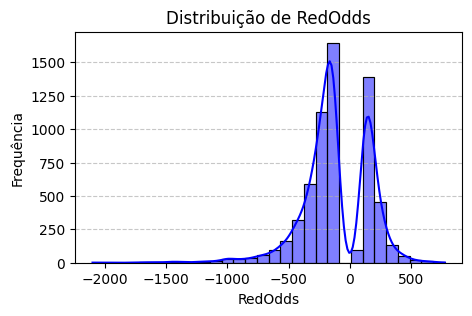

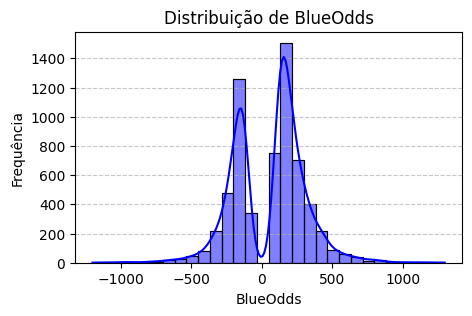

In [164]:
from scripts import *

colunas = ['RedOdds', 'BlueOdds']

for col in colunas:
    plot_distribution(data, col)

Iremos preencher as Odds faltantes usando a mediana das Odds de cada lutador da luta

In [165]:
global_blue_median = data['BlueOdds'].median()
global_red_median = data['RedOdds'].median()

# Preencher BlueOdds
data['BlueOdds'] = (
    data['BlueOdds']
    # Preenche primeiro com a mediana do lutador (agrupando por BlueFighter)
    .fillna(data.groupby('BlueFighter')['BlueOdds'].transform('median'))
    # Se ainda houver NaN (ex: lutador sem histórico), preenche com a mediana global
    .fillna(global_blue_median)
)

# Preencher RedOdds da mesma forma
data['RedOdds'] = (
    data['RedOdds']
    .fillna(data.groupby('RedFighter')['RedOdds'].transform('median'))
    .fillna(global_red_median)
)

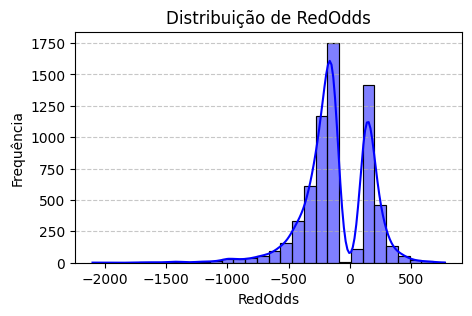

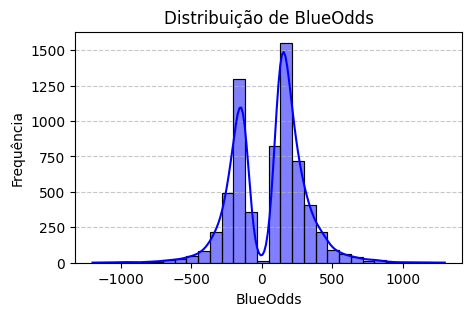

In [166]:
from scripts import *

colunas = ['RedOdds', 'BlueOdds']

for col in colunas:
    plot_distribution(data, col)

Analisando a plotagem e a descricao, iremos preencher usando a mediana

* BlueAvgSigStrLanded e RedAvgSigStrLanded

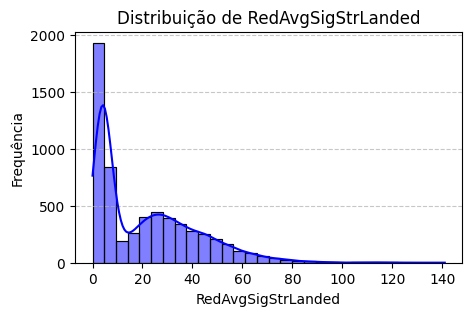

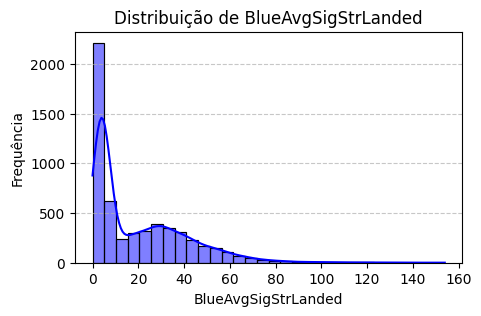

In [167]:
from scripts import *

colunas = ['RedAvgSigStrLanded', 'BlueAvgSigStrLanded']

for col in colunas:
    plot_distribution(data, col)

In [168]:
global_red_sig_str_mean = data['RedAvgSigStrLanded'].mean()
global_blue_sig_str_mean = data['BlueAvgSigStrLanded'].mean()

data['RedAvgSigStrLanded'] = (
    data['RedAvgSigStrLanded']
    # Preenche primeiro com a média do lutador (agrupando por RedFighter)
    .fillna(data.groupby('RedFighter')['RedAvgSigStrLanded'].transform('mean'))
    # Se ainda houver NaN (ex: lutador sem histórico), usa a média global
    .fillna(global_red_sig_str_mean)
)

# Preencher BlueAvgSigStrLanded
data['BlueAvgSigStrLanded'] = (
    data['BlueAvgSigStrLanded']
    .fillna(data.groupby('BlueFighter')['BlueAvgSigStrLanded'].transform('mean'))
    .fillna(global_blue_sig_str_mean)
)

* BlueAvgSigStrPct e RedAvgSigStrPct

In [169]:
global_red_sig_str_pctmean = data['RedAvgSigStrPct'].mean()
global_blue_sig_str_pctmean = data['BlueAvgSigStrPct'].mean()

data['RedAvgSigStrPct'] = (
    data['RedAvgSigStrPct']
    # Preenche primeiro com a média do lutador (agrupando por RedFighter)
    .fillna(data.groupby('RedFighter')['RedAvgSigStrPct'].transform('mean'))
    # Se ainda houver NaN (ex: lutador sem histórico), usa a média global
    .fillna(global_red_sig_str_pctmean)
)

# Preencher BlueAvgSigStrLanded
data['BlueAvgSigStrPct'] = (
    data['BlueAvgSigStrPct']
    .fillna(data.groupby('BlueFighter')['BlueAvgSigStrPct'].transform('mean'))
    .fillna(global_blue_sig_str_pctmean)
)

* BlueAvgSubAtt e RedAvgSubAtt

In [170]:
# Calcular a média global para fallback
global_red_sub_att_mean = data['RedAvgSubAtt'].mean()
global_blue_sub_att_mean = data['BlueAvgSubAtt'].mean()

# Preencher RedAvgSubAtt
data['RedAvgSubAtt'] = (
    data['RedAvgSubAtt']
    # Preenche primeiro com a média do lutador (agrupando por RedFighter)
    .fillna(data.groupby('RedFighter')['RedAvgSubAtt'].transform('mean'))
    # Se ainda houver NaN (ex: lutador sem histórico), usa a média global
    .fillna(global_red_sub_att_mean)
)

# Preencher BlueAvgSubAtt
data['BlueAvgSubAtt'] = (
    data['BlueAvgSubAtt']
    # Preenche primeiro com a média do lutador (agrupando por BlueFighter)
    .fillna(data.groupby('BlueFighter')['BlueAvgSubAtt'].transform('mean'))
    # Se ainda houver NaN, usa a média global
    .fillna(global_blue_sub_att_mean)
)

* BlueAvgTDLanded e RedAvgTDLanded

In [171]:
# Calcular a média global para fallback
global_red_td_mean = data['RedAvgTDLanded'].mean()
global_blue_td_mean = data['BlueAvgTDLanded'].mean()

# Preencher RedAvgTDLanded
data['RedAvgTDLanded'] = (
    data['RedAvgTDLanded']
    # Preenche primeiro com a média do lutador (agrupando por RedFighter)
    .fillna(data.groupby('RedFighter')['RedAvgTDLanded'].transform('mean'))
    # Se ainda houver NaN (ex: lutador sem histórico), usa a média global
    .fillna(global_red_td_mean)
)

# Preencher BlueAvgTDLanded
data['BlueAvgTDLanded'] = (
    data['BlueAvgTDLanded']
    # Preenche primeiro com a média do lutador (agrupando por BlueFighter)
    .fillna(data.groupby('BlueFighter')['BlueAvgTDLanded'].transform('mean'))
    # Se ainda houver NaN, usa a média global
    .fillna(global_blue_td_mean)
)

* BlueAvgTDPct e RedAvgTDPct

In [172]:
# Calcular a média global para fallback
global_red_td_pct_mean = data['RedAvgTDPct'].mean()
global_blue_td_pct_mean = data['BlueAvgTDPct'].mean()

# Preencher RedAvgTDPct
data['RedAvgTDPct'] = (
    data['RedAvgTDPct']
    # Preenche primeiro com a média do lutador (agrupando por RedFighter)
    .fillna(data.groupby('RedFighter')['RedAvgTDPct'].transform('mean'))
    # Se ainda houver NaN (ex: lutador sem histórico), usa a média global
    .fillna(global_red_td_pct_mean)
)

# Preencher BlueAvgTDPct
data['BlueAvgTDPct'] = (
    data['BlueAvgTDPct']
    # Preenche primeiro com a média do lutador (agrupando por BlueFighter)
    .fillna(data.groupby('BlueFighter')['BlueAvgTDPct'].transform('mean'))
    # Se ainda houver NaN, usa a média global
    .fillna(global_blue_td_pct_mean)
)

* BlueStance e RedStance

In [173]:
# Calcular a moda global para fallback
global_blue_stance_mode = data['BlueStance'].mode()[0]  # Moda global

# Preencher BlueStance com a moda do lutador (agrupando por BlueFighter)
data['BlueStance'] = (
    data['BlueStance']
    # Preenche primeiro com a moda do lutador (caso ele já tenha registros)
    .fillna(data.groupby('BlueFighter')['BlueStance'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))
    # Se ainda houver NaN (ex: lutador sem histórico ou moda indefinida), usa a moda global
    .fillna(global_blue_stance_mode)
)


* Finish, FinishRound, TotalFightSecs

In [174]:
data = data.dropna(subset=['Finish', 'FinishRound'])

In [175]:
for col in data.columns:
    print(f'Numero de NaN na coluna {col} = {data[col].isna().sum()}')

Numero de NaN na coluna RedFighter = 0
Numero de NaN na coluna BlueFighter = 0
Numero de NaN na coluna RedOdds = 0
Numero de NaN na coluna BlueOdds = 0
Numero de NaN na coluna Date = 0
Numero de NaN na coluna Winner = 0
Numero de NaN na coluna TitleBout = 0
Numero de NaN na coluna WeightClass = 0
Numero de NaN na coluna Gender = 0
Numero de NaN na coluna NumberOfRounds = 0
Numero de NaN na coluna BlueCurrentLoseStreak = 0
Numero de NaN na coluna BlueCurrentWinStreak = 0
Numero de NaN na coluna BlueDraws = 0
Numero de NaN na coluna BlueAvgSigStrLanded = 0
Numero de NaN na coluna BlueAvgSigStrPct = 0
Numero de NaN na coluna BlueAvgSubAtt = 0
Numero de NaN na coluna BlueAvgTDLanded = 0
Numero de NaN na coluna BlueAvgTDPct = 0
Numero de NaN na coluna BlueLongestWinStreak = 0
Numero de NaN na coluna BlueLosses = 0
Numero de NaN na coluna BlueTotalRoundsFought = 0
Numero de NaN na coluna BlueTotalTitleBouts = 0
Numero de NaN na coluna BlueWinsByDecisionMajority = 0
Numero de NaN na coluna Bl

Com todos os faltantes tratados, iremos partir para a proxima etapa do pre-processamento

### Feature Engineering

O objetivo e implemntar o conceito de elo, como no xadrex, para isso e preciso seguir a ordem temporal das lutas, por isso vamos ordena-las 

In [176]:
data = data.sort_values(by='Date').reset_index(drop=True)

In [177]:
elo_dict = {}
initial_elo = 1200  # Valor inicial padrão

# Inicializar todos os lutadores com Elo inicial
all_fighters = pd.concat([data['RedFighter'], data['BlueFighter']]).unique()
for fighter in all_fighters:
    elo_dict[fighter] = initial_elo

In [178]:
def update_elo(winner_elo, loser_elo, K=32):
    """
    Atualiza o Elo após uma luta.
    K = Fator de peso (quanto maior, mais rápido a pontuação muda).
    """
    expected_win = 1 / (1 + 10 ** ((loser_elo - winner_elo) / 400))
    change = K * (1 - expected_win)  # Vitória do favorito: pequena mudança
    
    new_winner_elo = winner_elo + change
    new_loser_elo = loser_elo - change
    
    return new_winner_elo, new_loser_elo

In [179]:
# Inicializar o dicionário de Elo
elo_dict = {}
initial_elo = 1200  # Valor inicial padrão

# Lista de todos os lutadores únicos
all_fighters = pd.concat([data['RedFighter'], data['BlueFighter']]).unique()

# Inicializar o Elo para todos os lutadores
for fighter in all_fighters:
    elo_dict[fighter] = initial_elo

# Função para atualizar o Elo
def update_elo(winner_elo, loser_elo, K=32):
    expected_win = 1 / (1 + 10 ** ((loser_elo - winner_elo) / 400))
    change = K * (1 - expected_win)
    return winner_elo + change, loser_elo - change

# Listas para armazenar o Elo atualizado após cada luta
red_elo_current = []
blue_elo_current = []

for idx, row in data.iterrows():
    red = row['RedFighter']
    blue = row['BlueFighter']
    winner = row['Winner']
    
    # Elo atual antes da luta (armazenado no dicionário)
    red_elo = elo_dict[red]
    blue_elo = elo_dict[blue]
    
    # Atualizar Elo com base no resultado
    if winner == 'Red':
        new_red, new_blue = update_elo(red_elo, blue_elo)
    elif winner == 'Blue':
        new_blue, new_red = update_elo(blue_elo, red_elo)
    else:
        new_red = red_elo
        new_blue = blue_elo
    
    # Atualizar o dicionário com o novo Elo
    elo_dict[red] = new_red
    elo_dict[blue] = new_blue
    
    # Armazenar o Elo atualizado (pós-luta)
    red_elo_current.append(new_red)
    blue_elo_current.append(new_blue)

# Adicionar colunas ao DataFrame
data['RedEloCurrent'] = red_elo_current
data['BlueEloCurrent'] = blue_elo_current

Ordenando o dataset pra visualizar o elo

In [180]:
data = data.sort_values(by='RedEloCurrent', ascending=False)

In [181]:
data.head(5)

,RedFighter,BlueFighter,RedOdds,BlueOdds,Date,Winner,TitleBout,WeightClass,Gender,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgSubAtt,BlueAvgTDLanded,BlueAvgTDPct,BlueLongestWinStreak,BlueLosses,BlueTotalRoundsFought,BlueTotalTitleBouts,BlueWinsByDecisionMajority,BlueWinsByDecisionSplit,BlueWinsByDecisionUnanimous,BlueWinsByKO,BlueWinsBySubmission,BlueWinsByTKODoctorStoppage,BlueWins,BlueStance,BlueHeightCms,BlueReachCms,BlueWeightLbs,RedCurrentLoseStreak,RedCurrentWinStreak,RedDraws,RedAvgSigStrLanded,RedAvgSigStrPct,RedAvgSubAtt,RedAvgTDLanded,RedAvgTDPct,RedLongestWinStreak,RedLosses,RedTotalRoundsFought,RedTotalTitleBouts,RedWinsByDecisionMajority,RedWinsByDecisionSplit,RedWinsByDecisionUnanimous,RedWinsByKO,RedWinsBySubmission,RedWinsByTKODoctorStoppage,RedWins,RedStance,RedHeightCms,RedReachCms,RedWeightLbs,RedAge,BlueAge,LoseStreakDif,WinStreakDif,LongestWinStreakDif,WinDif,LossDif,TotalRoundDif,TotalTitleBoutDif,KODif,SubDif,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,BetterRank,Finish,FinishRound,RedEloCurrent,BlueEloCurrent
5867,Jon Jones,Stipe Miocic,-550.0,410.0,2024-11-16,Red,True,Heavyweight,MALE,5,1,0,0,4.67,0.52,0.0,1.74,0.34,6,4,46,8,0,0,5,9,0,0,14,Orthodox,193.04,203.20,240,0,18,0,4.38,0.58,0.5,1.89,0.45,18,1,74,16,0,1,9,5,6,0,21,Orthodox,193.04,213.36,248,37,42,1,-18,-12,-7,3,-28,-8,4,-6,0.00,-10.16,5,0.29,-0.5,-0.15,Red,KO/TKO,3.0,1432.586778,1333.577598
4971,Jon Jones,Ciryl Gane,-155.0,135.0,2023-03-04,Red,True,Heavyweight,MALE,5,0,1,0,5.49,0.60,0.5,0.58,0.21,7,1,30,2,0,0,3,3,2,0,8,Orthodox,193.04,205.74,245,0,17,0,4.29,0.57,0.5,1.93,0.45,17,1,73,15,0,1,9,5,5,0,20,Orthodox,193.04,213.36,248,35,32,0,-16,-10,-12,0,-43,-13,-2,-3,0.00,-7.62,-3,1.20,0.0,-1.35,Blue,SUB,1.0,1419.930646,1247.107747
3885,Jon Jones,Dominick Reyes,-460.0,365.0,2020-02-08,Red,True,Light Heavyweight,MALE,5,0,6,0,5.03,0.52,0.4,0.39,0.16,6,0,10,0,0,1,1,3,1,0,6,Southpaw,193.04,195.58,205,0,16,0,4.31,0.57,0.5,1.90,0.46,16,1,68,14,0,1,8,5,5,0,19,Orthodox,193.04,213.36,205,32,30,0,-10,-10,-13,1,-58,-14,-2,-4,0.00,-17.78,2,0.72,-0.1,-1.51,Red,U-DEC,5.0,1410.597966,1269.482037
5617,Islam Makhachev,Dustin Poirier,-420.0,-110.0,2024-06-01,Red,True,Lightweight,MALE,5,0,1,0,5.30,0.50,1.3,1.24,0.36,5,8,75,3,1,0,6,12,4,0,23,Southpaw,175.26,182.88,155,0,13,0,2.65,0.59,1.1,3.19,0.53,13,1,34,3,0,0,5,3,6,0,14,Southpaw,177.80,177.80,155,32,35,0,-12,-8,9,7,41,0,9,-2,-2.54,5.08,3,2.65,0.2,-1.95,Red,SUB,5.0,1402.092746,1348.861691
3629,Jon Jones,Thiago Santos,-670.0,485.0,2019-07-06,Red,True,Light Heavyweight,MALE,5,0,4,0,4.44,0.47,0.1,0.83,0.40,4,5,32,0,0,0,2,11,0,0,13,Orthodox,187.96,193.04,205,0,15,0,4.30,0.57,0.4,1.85,0.44,15,1,63,13,0,0,8,5,5,0,18,Orthodox,193.04,213.36,205,31,35,0,-11,-11,-5,-4,-31,-13,6,-5,-5.08,-20.32,-4,0.14,-0.3,-1.02,Red,S-DEC,5.0,1399.903218,1297.087211


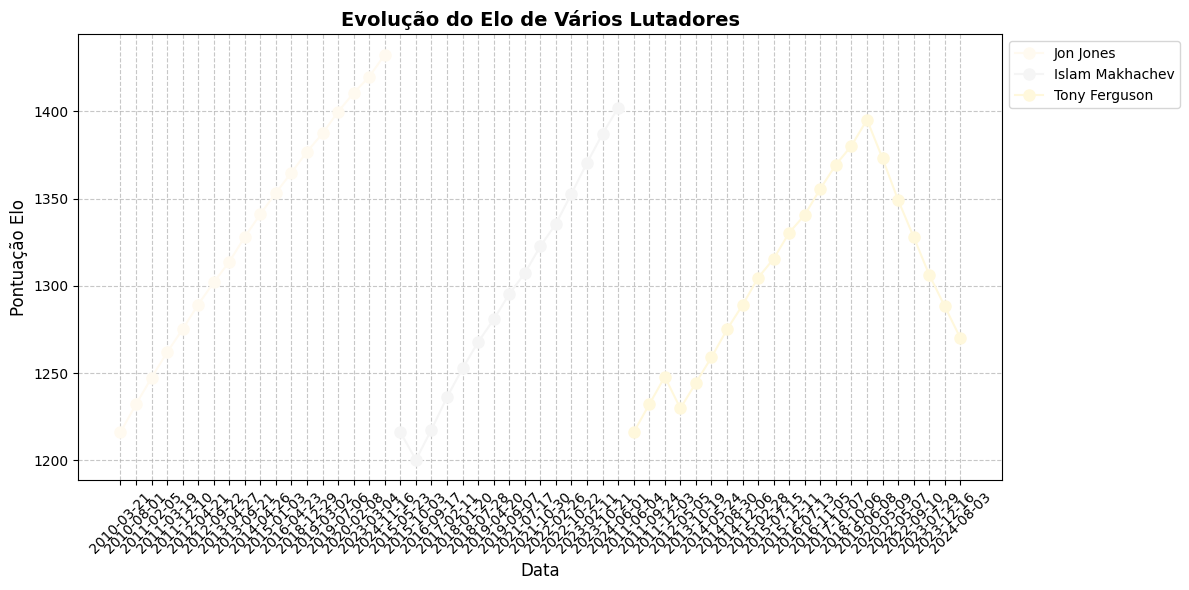

In [182]:
from scripts import *

names  = ['Jon Jones', 'Islam Makhachev', 'Tony Ferguson']

plot_elo_over_time(names, data)

Como Finish	e FinishRound sao resultados da luta, itemos dropa-los, pelo menos por hora

In [183]:
data = data.drop(columns=['Finish','FinishRound', 'Date'])

### Normalizacao

In [184]:
from sklearn.preprocessing import QuantileTransformer

colunas_a_normalizar = [
    'RedOdds', 'BlueOdds',
    'BlueHeightCms', 'BlueReachCms', 'BlueWeightLbs',
    'RedHeightCms', 'RedReachCms', 'RedWeightLbs',
    'RedEloCurrent', 'BlueEloCurrent'
]

transformer = QuantileTransformer()
data[colunas_a_normalizar] = transformer.fit_transform(data[colunas_a_normalizar])


### Label encoding

In [185]:
data['Winner'] = data['Winner'].apply(lambda x: 1 if x== 'Red' else 0)

In [186]:
from sklearn.preprocessing import LabelEncoder

lencoder = LabelEncoder()

all_fighters = pd.concat([data['RedFighter'], data['BlueFighter']]).unique()

lencoder.fit(all_fighters)

data['RedFighter'] = lencoder.transform(data['RedFighter'])
data['BlueFighter'] = lencoder.transform(data['BlueFighter'])


### One Hot Encoding

In [187]:
object_cols = data.select_dtypes(include=['object']).columns


data = pd.get_dummies(data, columns=object_cols)

Com os dados tratados, podemos escreve-los e comecar a desenvolver o modelo

In [188]:
data.to_csv('dados_tratados.csv', index=False)

In [189]:
data

,RedFighter,BlueFighter,RedOdds,BlueOdds,Winner,TitleBout,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgSubAtt,BlueAvgTDLanded,BlueAvgTDPct,BlueLongestWinStreak,BlueLosses,BlueTotalRoundsFought,BlueTotalTitleBouts,BlueWinsByDecisionMajority,BlueWinsByDecisionSplit,BlueWinsByDecisionUnanimous,BlueWinsByKO,BlueWinsBySubmission,BlueWinsByTKODoctorStoppage,BlueWins,BlueHeightCms,BlueReachCms,BlueWeightLbs,RedCurrentLoseStreak,RedCurrentWinStreak,RedDraws,RedAvgSigStrLanded,RedAvgSigStrPct,RedAvgSubAtt,RedAvgTDLanded,RedAvgTDPct,RedLongestWinStreak,RedLosses,RedTotalRoundsFought,RedTotalTitleBouts,RedWinsByDecisionMajority,RedWinsByDecisionSplit,RedWinsByDecisionUnanimous,RedWinsByKO,RedWinsBySubmission,RedWinsByTKODoctorStoppage,RedWins,RedHeightCms,RedReachCms,RedWeightLbs,RedAge,BlueAge,LoseStreakDif,WinStreakDif,LongestWinStreakDif,WinDif,LossDif,TotalRoundDif,TotalTitleBoutDif,KODif,SubDif,HeightDif,ReachDif,AgeDif,SigStrDif,AvgSubAttDif,AvgTDDif,RedEloCurrent,BlueEloCurrent,WeightClass_Bantamweight,WeightClass_Catch Weight,WeightClass_Featherweight,WeightClass_Flyweight,WeightClass_Heavyweight,WeightClass_Light Heavyweight,WeightClass_Lightweight,WeightClass_Middleweight,WeightClass_Welterweight,WeightClass_Women's Bantamweight,WeightClass_Women's Featherweight,WeightClass_Women's Flyweight,WeightClass_Women's Strawweight,Gender_FEMALE,Gender_MALE,BlueStance_Open Stance,BlueStance_Orthodox,BlueStance_Southpaw,BlueStance_Switch,BlueStance_Switch,RedStance_Open Stance,RedStance_Orthodox,RedStance_Southpaw,RedStance_Switch,BetterRank_Blue,BetterRank_Red,BetterRank_neither
5867,962,1796,0.050551,0.937437,1,True,5,1,0,0,4.6700,0.520,0.0000,1.7400,0.340,6,4,46,8,0,0,5,9,0,0,14,0.963463,0.976476,0.942442,0,18,0,4.3800,0.580,0.5000,1.8900,0.450,18,1,74,16,0,1,9,5,6,0,21,0.964965,0.996997,0.955455,37,42,1,-18,-12,-7,3,-28,-8,4,-6,0.00,-10.16,5,0.2900,-0.5000,-0.1500,1.000000,0.993761,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False
4971,962,375,0.477477,0.525025,1,True,5,0,1,0,5.4900,0.600,0.5000,0.5800,0.210,7,1,30,2,0,0,3,3,2,0,8,0.963463,0.988989,0.950450,0,17,0,4.2900,0.570,0.5000,1.9300,0.450,17,1,73,15,0,1,9,5,5,0,20,0.964965,0.996997,0.955455,35,32,0,-16,-10,-12,0,-43,-13,-2,-3,0.00,-7.62,-3,1.2000,0.0000,-1.3500,0.999667,0.843665,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False
3885,962,540,0.076076,0.916917,1,True,5,0,6,0,5.0300,0.520,0.4000,0.3900,0.160,6,0,10,0,0,1,1,3,1,0,6,0.963463,0.891391,0.889890,0,16,0,4.3100,0.570,0.5000,1.9000,0.460,16,1,68,14,0,1,8,5,5,0,19,0.964965,0.996997,0.886887,32,30,0,-10,-10,-13,1,-58,-14,-2,-4,0.00,-17.78,2,0.7200,-0.1000,-1.5100,0.999422,0.930157,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False
5617,772,566,0.098599,0.361361,1,True,5,0,1,0,5.3000,0.500,1.3000,1.2400,0.360,5,8,75,3,1,0,6,12,4,0,23,0.391391,0.514014,0.482983,0,13,0,2.6500,0.590,1.1000,3.1900,0.530,13,1,34,3,0,0,5,3,6,0,14,0.492993,0.329329,0.476977,32,35,0,-12,-8,9,7,41,0,9,-2,-2.54,5.08,3,2.6500,0.2000,-1.9500,0.999199,0.996387,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False
3629,962,1847,0.031031,0.966027,1,True,5,0,4,0,4.4400,0.470,0.1000,0.8300,0.400,4,5,32,0,0,0,2,11,0,0,13,0.853854,0.840841,0.889890,0,15,0,4.3000,0.570,0.4000,1.8500,0.440,15,1,63,13,0,0,8,5,5,0,18,0.964965,0.996997,0.886887,31,35,0,-11,-11,-5,-4,-31,-13,6,-5,-5.08,-20.32,-4,0.1400,-0.3000,-1.0200,0.999141,0.973960,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True

In [190]:
for col in data.columns:
    print (col)

RedFighter
BlueFighter
RedOdds
BlueOdds
Winner
TitleBout
NumberOfRounds
BlueCurrentLoseStreak
BlueCurrentWinStreak
BlueDraws
BlueAvgSigStrLanded
BlueAvgSigStrPct
BlueAvgSubAtt
BlueAvgTDLanded
BlueAvgTDPct
BlueLongestWinStreak
BlueLosses
BlueTotalRoundsFought
BlueTotalTitleBouts
BlueWinsByDecisionMajority
BlueWinsByDecisionSplit
BlueWinsByDecisionUnanimous
BlueWinsByKO
BlueWinsBySubmission
BlueWinsByTKODoctorStoppage
BlueWins
BlueHeightCms
BlueReachCms
BlueWeightLbs
RedCurrentLoseStreak
RedCurrentWinStreak
RedDraws
RedAvgSigStrLanded
RedAvgSigStrPct
RedAvgSubAtt
RedAvgTDLanded
RedAvgTDPct
RedLongestWinStreak
RedLosses
RedTotalRoundsFought
RedTotalTitleBouts
RedWinsByDecisionMajority
RedWinsByDecisionSplit
RedWinsByDecisionUnanimous
RedWinsByKO
RedWinsBySubmission
RedWinsByTKODoctorStoppage
RedWins
RedHeightCms
RedReachCms
RedWeightLbs
RedAge
BlueAge
LoseStreakDif
WinStreakDif
LongestWinStreakDif
WinDif
LossDif
TotalRoundDif
TotalTitleBoutDif
KODif
SubDif
HeightDif
ReachDif
AgeDif
SigStr